In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [2]:
figs = os.path.join('../../plots')
file = os.path.join('../../results/raw-results.csv')

df = pd.read_csv(file)

sns.set_context("paper", font_scale=2.6)   
sns.set_style("ticks")

In [3]:
df = df[df['Experiment'] == 'RETU']

<Figure size 432x288 with 0 Axes>

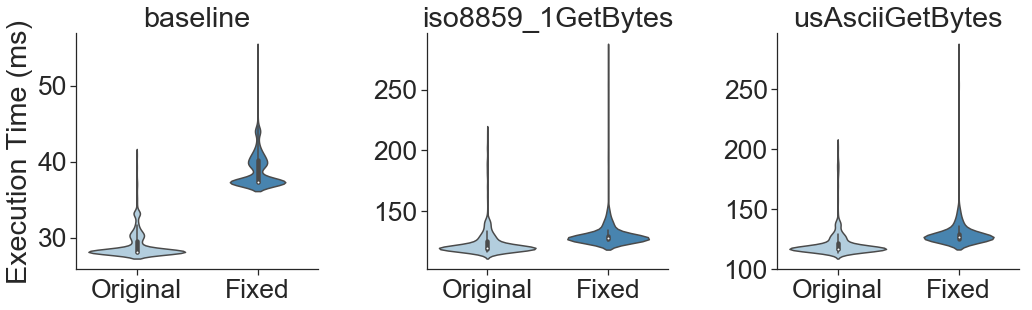

In [4]:
%matplotlib inline
plt.clf()

sns.set(font_scale=2.4)
sns.set_style("ticks")

import math

methods = ['baseline', 'iso8859_1GetBytes', 'usAsciiGetBytes']

bench = df.query('Class== "AbstractStringLayoutStringEncodingBenchmark" and Method in @methods')
#bench = bench[bench['Method'] == 'baseline']
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')
# Execution time -> Throughput
bench['Score Norm'] = 1e6 / bench['Score']

cat = sns.catplot(data=bench, x='Version', y='Score Norm', col='Method',
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=1, palette="Blues")
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_titles("{col_name}")

plt.tight_layout()
plt.savefig(os.path.join(figs, 'RETU-log4j2-abstractstringlayoutstringencoding.pdf'))

